In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import calendar
import datetime as dt
import scipy.stats as sps
import random

In [2]:
data = pd.read_csv('variables.csv')

In [3]:
data.head()

,Unnamed: 0,Recnum,Cardnum_day_since,Cardnum_Amount_AVG_0,Cardnum_Amount_MAX_0,Cardnum_Amount_MED_0,Cardnum_Amount_TOL_0,Cardnum_Amount_Actual/AVG_0,Cardnum_Amount_Actual/MAX_0,Cardnum_Amount_Actual/MED_0,...,Merch full_Amount_1_by_3,Merch full_count_1_by_7,Merch full_Amount_1_by_7,Merch full_count_1_by_14,Merch full_Amount_1_by_14,Merch full_count_1_by_30,Merch full_Amount_1_by_30,dow_risk,distance_since,Fraud
0,0,1,365.0,3.62,3.62,3.62,3.62,1.0,1.0,1.0,...,3.0,7.0,7.0,14.0,14.0,30.0,30.0,0.025994,0.0,0
1,1,2,365.0,31.42,31.42,31.42,31.42,1.0,1.0,1.0,...,3.0,7.0,7.0,14.0,14.0,30.0,30.0,0.025994,0.0,0
2,2,3,365.0,178.49,178.49,178.49,178.49,1.0,1.0,1.0,...,3.0,7.0,7.0,14.0,14.0,30.0,30.0,0.025994,0.0,0
3,3,4,365.0,3.62,3.62,3.62,3.62,1.0,1.0,1.0,...,3.0,7.0,7.0,14.0,14.0,30.0,30.0,0.025994,0.0,0
4,4,5,0.0,3.62,3.62,3.62,7.24,1.0,1.0,1.0,...,3.0,7.0,7.0,14.0,14.0,30.0,30.0,0.025994,0.0,0


## Select by Filters

In [4]:
df_ori = pd.read_csv('clean card transaction.csv')

In [5]:
data.insert(loc=2, column='date', value=df_ori['Date'])

In [6]:
data.head()

,Unnamed: 0,Recnum,date,Cardnum_day_since,Cardnum_Amount_AVG_0,Cardnum_Amount_MAX_0,Cardnum_Amount_MED_0,Cardnum_Amount_TOL_0,Cardnum_Amount_Actual/AVG_0,Cardnum_Amount_Actual/MAX_0,...,Merch full_Amount_1_by_3,Merch full_count_1_by_7,Merch full_Amount_1_by_7,Merch full_count_1_by_14,Merch full_Amount_1_by_14,Merch full_count_1_by_30,Merch full_Amount_1_by_30,dow_risk,distance_since,Fraud
0,0,1,2010-01-01,365.0,3.62,3.62,3.62,3.62,1.0,1.0,...,3.0,7.0,7.0,14.0,14.0,30.0,30.0,0.025994,0.0,0
1,1,2,2010-01-01,365.0,31.42,31.42,31.42,31.42,1.0,1.0,...,3.0,7.0,7.0,14.0,14.0,30.0,30.0,0.025994,0.0,0
2,2,3,2010-01-01,365.0,178.49,178.49,178.49,178.49,1.0,1.0,...,3.0,7.0,7.0,14.0,14.0,30.0,30.0,0.025994,0.0,0
3,3,4,2010-01-01,365.0,3.62,3.62,3.62,3.62,1.0,1.0,...,3.0,7.0,7.0,14.0,14.0,30.0,30.0,0.025994,0.0,0
4,4,5,2010-01-01,0.0,3.62,3.62,3.62,7.24,1.0,1.0,...,3.0,7.0,7.0,14.0,14.0,30.0,30.0,0.025994,0.0,0


In [7]:
#train_test excludes last two months and first two weeks
df = data[(data.date > '2010-01-14') & (data.date < '2010-11-01')]

In [8]:
df = df.iloc[:,3:]

In [9]:
df.head()

,Cardnum_day_since,Cardnum_Amount_AVG_0,Cardnum_Amount_MAX_0,Cardnum_Amount_MED_0,Cardnum_Amount_TOL_0,Cardnum_Amount_Actual/AVG_0,Cardnum_Amount_Actual/MAX_0,Cardnum_Amount_Actual/MED_0,Cardnum_Amount_Actual/TOL_0,Cardnum_count_0,...,Merch full_Amount_1_by_3,Merch full_count_1_by_7,Merch full_Amount_1_by_7,Merch full_count_1_by_14,Merch full_Amount_1_by_14,Merch full_count_1_by_30,Merch full_Amount_1_by_30,dow_risk,distance_since,Fraud
3338,1.0,333.47,333.47,333.47,333.47,1.0,1.0,1.0,1.0,1,...,0.6,0.466667,0.466667,0.466667,0.466667,1.000000,1.000000,0.025994,461.702205,0
3339,1.0,4.37,4.37,4.37,4.37,1.0,1.0,1.0,1.0,1,...,3.0,7.000000,7.000000,14.000000,14.000000,30.000000,30.000000,0.025994,758.157873,0
3340,1.0,271.93,271.93,271.93,271.93,1.0,1.0,1.0,1.0,1,...,3.0,7.000000,7.000000,3.230769,3.230769,6.923077,6.923077,0.025994,75.240452,0
3341,0.0,3.62,3.62,3.62,7.24,1.0,1.0,1.0,0.5,2,...,3.0,7.000000,7.000000,14.000000,14.000000,30.000000,30.000000,0.025994,0.000000,0
3342,365.0,16.28,16.28,16.28,16.28,1.0,1.0,1.0,1.0,1,...,1.5,2.333333,2.333333,2.800000,2.800000,6.000000,6.000000,0.025994,0.000000,0


In [10]:
goods = df.loc[df['Fraud'] == 0]
bads = df.loc[df['Fraud'] == 1]

In [11]:
KSFDR = pd.DataFrame({'Variable number': [i for i in range(df.shape[1])], 'Variable': df.columns})

In [12]:
KSFDR['KS'] = np.nan

**Calculate Univariate KS**

In [13]:
i = 0
for column in df:
    KSFDR['KS'][i] = sps.ks_2samp(goods[column],bads[column])[0]
    i = i+1

**Create Univariate FDR@3%**

In [14]:
topRows = int(round(len(df)*0.03))
numbads = len(bads)
listvars = list(df.columns)
listvars.remove('Fraud')

In [15]:
j = 0
for column in listvars:
    temp = df[[column,'Fraud']].copy()
    temp0 = temp.sort_values(column,ascending=False)
    temp1 = temp0.head(topRows)
    #temp2 = temp0.tail(topRows)
    needed1 = temp1.loc[:,'Fraud']
    #needed2 = temp2.loc[:,'Fraud']
    FDR1 = sum(needed1)/numbads
    #FDR2 = sum(needed2)/numbads
    #FDRate = np.maximum(FDR1,FDR2) 
    KSFDR.loc[j, 'FDR at 3%'] = FDR1
    
    j = j + 1

In [16]:
KSFDR

,Variable number,Variable,KS,FDR at 3%
0,0,Cardnum_day_since,0.291223,0.023041
1,1,Cardnum_Amount_AVG_0,0.547575,0.317972
2,2,Cardnum_Amount_MAX_0,0.547575,0.317972
3,3,Cardnum_Amount_MED_0,0.547575,0.317972
4,4,Cardnum_Amount_TOL_0,0.575873,0.500000
...,...,...,...,...
495,495,Merch full_count_1_by_30,0.104933,0.024194
496,496,Merch full_Amount_1_by_30,0.104933,0.023041
497,497,dow_risk,0.134586,0.063364
498,498,distance_since,0.301463,0.012673


In [17]:
KSFDR = KSFDR.fillna(1)

In [18]:
sort_ks = KSFDR.sort_values(by = 'KS', ascending = False)

In [19]:
sort_ks.head(10)

,Variable number,Variable,KS,FDR at 3%
499,499,Fraud,1.000000,1.000000
141,141,card_merch_Amount_TOL_7,0.665131,0.593318
150,150,card_merch_Amount_TOL_14,0.664955,0.591014
251,251,card_state_Amount_TOL_7,0.663664,0.523041
196,196,card_zip_Amount_TOL_7,0.660243,0.597926
306,306,card_merch_zip_Amount_TOL_7,0.659196,0.597926
315,315,card_merch_zip_Amount_TOL_14,0.655746,0.594470
77,77,Merchnum_Amount_TOL_3,0.654447,0.387097
205,205,card_zip_Amount_TOL_14,0.654192,0.581797
132,132,card_merch_Amount_TOL_3,0.654103,0.588710


In [20]:
sort_fdr = KSFDR.sort_values(by = 'FDR at 3%', ascending = False)

In [21]:
sort_fdr.head(10)

,Variable number,Variable,KS,FDR at 3%
499,499,Fraud,1.000000,1.000000
196,196,card_zip_Amount_TOL_7,0.660243,0.597926
306,306,card_merch_zip_Amount_TOL_7,0.659196,0.597926
315,315,card_merch_zip_Amount_TOL_14,0.655746,0.594470
187,187,card_zip_Amount_TOL_3,0.647288,0.593318
141,141,card_merch_Amount_TOL_7,0.665131,0.593318
150,150,card_merch_Amount_TOL_14,0.664955,0.591014
132,132,card_merch_Amount_TOL_3,0.654103,0.588710
297,297,card_merch_zip_Amount_TOL_3,0.645500,0.585253
205,205,card_zip_Amount_TOL_14,0.654192,0.581797


In [22]:
#sort_ks.to_csv('vars_ksfdr.csv')

In [23]:
#sort_fdr.to_csv('fdr.csv')

In [24]:
KSFDR['rank_ks'] = KSFDR['KS'].rank(ascending = True)
KSFDR['rank_FDR'] = KSFDR['FDR at 3%'].rank(ascending = True)
KSFDR['average_rank'] = (KSFDR['rank_ks'] + KSFDR['rank_FDR']) / 2
KSFDR.sort_values(by=['average_rank'], ascending=False, inplace=True)

In [25]:
vars_filter = KSFDR[:81]

In [26]:
vars_filter

,Variable number,Variable,KS,FDR at 3%,rank_ks,rank_FDR,average_rank
499,499,Fraud,1.000000,1.000000,500.0,500.0,500.00
141,141,card_merch_Amount_TOL_7,0.665131,0.593318,499.0,495.5,497.25
196,196,card_zip_Amount_TOL_7,0.660243,0.597926,496.0,498.5,497.25
306,306,card_merch_zip_Amount_TOL_7,0.659196,0.597926,495.0,498.5,496.75
150,150,card_merch_Amount_TOL_14,0.664955,0.591014,498.0,494.0,496.00
...,...,...,...,...,...,...,...
349,349,Merch full_Amount_AVG_3,0.547575,0.317972,396.5,398.5,397.50
314,314,card_merch_zip_Amount_MED_14,0.547575,0.317972,396.5,398.5,397.50
321,321,card_merch_zip_Amount_AVG_30,0.547575,0.317972,396.5,398.5,397.50
322,322,card_merch_zip_Amount_MAX_30,0.547575,0.317972,396.5,398.5,397.50


In [27]:
#vars_filter.to_csv('var_filter.csv')

**Select by Wrapper**

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV, RFE
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [29]:
Y = df['Fraud']
input_data = df[list(vars_filter['Variable'].values)].drop(columns = ['Fraud'])

In [30]:
#Z-scale
input_data = (input_data - input_data.mean()) / input_data.std()

**Backward with SFS**

In [31]:
def fdr_prob(y, y_prob, cutoff = 0.03):
    if len(y_prob.shape) != 1:
        y_prob = y_prob[:,-1]
    num_fraud = len(y[y == 1])
    
    sorted_prob = np.asarray(sorted(zip(y_prob, y), key = lambda x: x[0], reverse = True))
    
    cutoff_bin = sorted_prob[0:int(len(y) * cutoff), 1:]
    
    return len(cutoff_bin[cutoff_bin == 1]) / num_fraud


def fdr(classifier, x, y, cutoff = 0.03):
    return fdr_prob(y,classifier.predict_proba(x), cutoff)

In [32]:
backward = SFS(LogisticRegression(), 
           k_features=1, 
           forward=False, 
           floating=False, 
           verbose=2,
           n_jobs = -1,
           scoring=fdr,
           cv=10)

backward.fit(input_data, Y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  7.8min finished

[2021-05-02 12:19:22] Features: 79/1 -- score: 0.5947072975140337[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:  7.6min finished

[2021-05-02 12:26:57] Features: 78/1 -- score: 0.5970061480887463[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:  7.4min finished

[2021-05-02 12:34:21] Features: 77/1 -- score: 0.599304998663459[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  77 out of

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.4min finished

[2021-05-02 15:02:35] Features: 49/1 -- score: 0.6062282812082331[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:  3.4min finished

[2021-05-02 15:05:56] Features: 48/1 -- score: 0.6062282812082331[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  3.1min finished

[2021-05-02 15:09:05] Features: 47/1 -- score: 0.6062282812082331[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:  3.0min finished

[2021-05-02 15:12:06] Features: 46/1 -- s

[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:   22.0s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   25.9s finished

[2021-05-02 15:56:17] Features: 17/1 -- score: 0.6176557070302058[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:   20.6s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   23.9s finished

[2021-05-02 15:56:41] Features: 16/1 -- score: 0.6176557070302058[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:   18.4s remaining:   11.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   19.6s finished

[2021-05-02 15:57:01] Features: 15/1 -- score: 0.6176557070302058[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    9.5s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  15 out o

SequentialFeatureSelector(cv=10, estimator=LogisticRegression(), forward=False,
                          n_jobs=-1, scoring=<function fdr at 0x7fc127572b80>,
                          verbose=2)

In [33]:
backward.k_feature_names_

('card_merch_Amount_TOL_7',)

In [34]:
features = pd.DataFrame.from_dict(backward.get_metric_dict()).T

In [35]:
features

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
80,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.4942528735632184, 0.5747126436781609, 0.627...",0.587811,"(card_merch_Amount_TOL_7, card_zip_Amount_TOL_...",0.11149,0.150112,0.0500375
79,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.4942528735632184, 0.5747126436781609, 0.639...",0.594707,"(card_merch_Amount_TOL_7, card_zip_Amount_TOL_...",0.110447,0.148707,0.049569
78,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.4942528735632184, 0.5862068965517241, 0.639...",0.597006,"(card_merch_Amount_TOL_7, card_zip_Amount_TOL_...",0.109806,0.147845,0.0492815
77,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[0.4942528735632184, 0.5862068965517241, 0.639...",0.599305,"(card_merch_Amount_TOL_7, card_zip_Amount_TOL_...",0.109867,0.147927,0.0493089
76,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[0.4942528735632184, 0.5862068965517241, 0.639...",0.599305,"(card_merch_Amount_TOL_7, card_zip_Amount_TOL_...",0.109867,0.147927,0.0493089
...,...,...,...,...,...,...,...
5,"(0, 22, 29, 33, 38)","[0.5172413793103449, 0.5517241379310345, 0.604...",0.60274,"(card_merch_Amount_TOL_7, card_zip_Amount_TOL_...",0.0985053,0.132629,0.0442097
4,"(0, 29, 33, 38)","[0.45977011494252873, 0.4942528735632184, 0.56...",0.59464,"(card_merch_Amount_TOL_7, Merch full_Amount_TO...",0.102879,0.138518,0.0461725
3,"(0, 29, 38)","[0.5172413793103449, 0.5517241379310345, 0.593...",0.588867,"(card_merch_Amount_TOL_7, Merch full_Amount_TO...",0.0804103,0.108266,0.0360885
2,"(0, 38)","[0.5402298850574713, 0.4942528735632184, 0.581...",0.580821,"(card_merch_Amount_TOL_7, Merch full_Amount_TO...",0.099157,0.133506,0.0445022


In [42]:
forward = SFS(DecisionTreeClassifier(max_depth = 10), 
           k_features=80, 
           forward=True, 
           floating=False, 
           verbose=2,
           n_jobs = -1,
           scoring=fdr,
           cv=10)

forward.fit(input_data, Y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   23.7s finished

[2021-05-02 16:31:49] Features: 1/80 -- score: 0.5393344025661587[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:   27.7s finished

[2021-05-02 16:32:16] Features: 2/80 -- score: 0.5566158781074579[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:   37.3s finished

[2021-05-02 16:32:54] Features: 3/80 -- score: 0.5438652766639935[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  77 out o

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.6min finished

[2021-05-02 17:56:18] Features: 31/80 -- score: 0.5266372627639668[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:  4.8min finished

[2021-05-02 18:01:04] Features: 32/80 -- score: 0.5289628441593157[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.6min finished

[2021-05-02 18:05:38] Features: 33/80 -- score: 0.5289494787489977[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:  4.7min finished

[2021-05-02 18:10:17] Features: 34/80 

[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  3.2min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  3.9min finished

[2021-05-02 20:25:01] Features: 63/80 -- score: 0.5231756214915798[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:  3.2min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:  3.9min finished

[2021-05-02 20:28:57] Features: 64/80 -- score: 0.5209035017375033[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:  3.2min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  3.3min finished

[2021-05-02 20:32:13] Features: 65/80 -- score: 0.5231756214915797[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  1.7min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  15 ou

SequentialFeatureSelector(cv=10, estimator=DecisionTreeClassifier(max_depth=10),
                          k_features=80, n_jobs=-1,
                          scoring=<function fdr at 0x7fc127572b80>, verbose=2)

In [43]:
features1 = pd.DataFrame.from_dict(forward.get_metric_dict()).T

In [44]:
features1

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.5517241379310345, 0.4367816091954023, 0.593...",0.539334,"(card_merch_Amount_TOL_7,)",0.0827783,0.111454,0.0371513
2,"(0, 7)","[0.5632183908045977, 0.4942528735632184, 0.569...",0.556616,"(card_merch_Amount_TOL_7, card_zip_Amount_TOL_3)",0.0884805,0.119132,0.0397105
3,"(0, 5, 7)","[0.5172413793103449, 0.4827586206896552, 0.546...",0.543865,"(card_merch_Amount_TOL_7, card_merch_Amount_TO...",0.0719878,0.0969255,0.0323085
4,"(0, 1, 5, 7)","[0.5287356321839081, 0.4482758620689655, 0.465...",0.544948,"(card_merch_Amount_TOL_7, card_zip_Amount_TOL_...",0.0780399,0.105074,0.0350247
5,"(0, 1, 2, 5, 7)","[0.5402298850574713, 0.4367816091954023, 0.465...",0.546084,"(card_merch_Amount_TOL_7, card_zip_Amount_TOL_...",0.0861467,0.115989,0.0386631
...,...,...,...,...,...,...,...
76,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.41379310344827586, 0.5172413793103449, 0.51...",0.495589,"(card_merch_Amount_TOL_7, card_zip_Amount_TOL_...",0.130436,0.175622,0.0585406
77,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.41379310344827586, 0.5057471264367817, 0.51...",0.497835,"(card_merch_Amount_TOL_7, card_zip_Amount_TOL_...",0.130298,0.175436,0.0584786
78,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.4367816091954023, 0.5172413793103449, 0.453...",0.502406,"(card_merch_Amount_TOL_7, card_zip_Amount_TOL_...",0.123868,0.166778,0.0555926
79,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.41379310344827586, 0.5287356321839081, 0.44...",0.495509,"(card_merch_Amount_TOL_7, card_zip_Amount_TOL_...",0.104869,0.141198,0.0470658


In [45]:
#features.to_csv('back_cv10.csv')

In [46]:
#features1.to_csv('forward_cv10.csv')

In [39]:
#features.to_csv('feature_cv.csv')

In [40]:
#features.to_csv('feature_rank.csv')

In [41]:
#final.to_csv('final_v2.csv')

### Plot

In [2]:
features = pd.read_csv('feature_cv.csv')

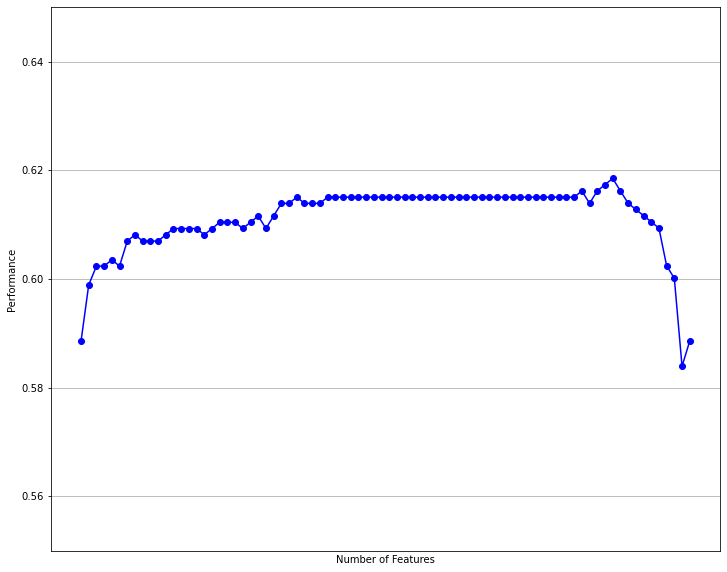

In [52]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

data = features.T

fig1 = plot_sfs(data, kind = None, figsize = (12,10))
plt.ylim([0.55,0.65])
plt.grid()

In [45]:
data

{0: {'Unnamed: 0': 80,
  'feature_idx': '(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79)',
  'cv_scores': '[0.55747126 0.6954023  0.45086705 0.56647399 0.67241379]',
  'avg_score': 0.5885256793568534,
  'feature_names': "('card_merch_Amount_TOL_7', 'card_zip_Amount_TOL_7', 'card_merch_zip_Amount_TOL_7', 'card_merch_Amount_TOL_14', 'card_merch_zip_Amount_TOL_14', 'card_merch_Amount_TOL_3', 'card_zip_Amount_TOL_14', 'card_zip_Amount_TOL_3', 'card_merch_zip_Amount_TOL_3', 'card_state_Amount_TOL_3', 'card_state_Amount_TOL_7', 'card_merch_Amount_TOL_1', 'card_state_Amount_TOL_1', 'card_zip_Amount_TOL_1', 'card_merch_Amount_TOL_30', 'card_merch_zip_Amount_TOL_1', 'card_merch_zip_Amount_TOL_30', 'card_state_Amount_TOL_14', 'card_merch